<a href="https://colab.research.google.com/github/Sweta-Das/CODSOFT/blob/main/codsoft_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cc_df = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/creditcard.csv')

In [4]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in 2 days, where there're 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc_df['Class'].unique()

array([0, 1])

In [7]:
cc_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Handling Imbalanced Data Through Undersampling & OverSampling

In [9]:
cc_df1 = cc_df
cc_df2 = cc_df

## Undersampling

In [10]:
# Separating features and target variables
X = cc_df1.drop('Class', axis=1)
y = cc_df1['Class']

In [11]:
# Performing data preprocessing and normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [8]:
%%capture
!pip install -U imbalanced-learn

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_norm, y)

In [13]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

### Classification - Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print(y_pred_lr)

[1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1]


In [20]:
# print(len(y_pred_lr))
from collections import Counter

value_count = Counter(y_pred_lr)

print(f"Logistic Regression Prediction: Out of {len(y_pred_lr)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Logistic Regression Prediction: Out of 296 transactions, there're 94 frauds and 202 normal transactions.


### Classification - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1]


In [22]:
value_count = Counter(y_pred_rf)

print(f"Random Forest Prediction: Out of {len(y_pred_rf)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Random Forest Prediction: Out of 296 transactions, there're 91 frauds and 205 normal transactions.


### Classification - Gradient Boosting Algorithm

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gb = gbc.predict(X_test)
print(y_pred_gb)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1]


In [35]:
value_count = Counter(y_pred_gb)

print(f"Gradient Boosting Prediction: Out of {len(y_pred_gb)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Gradient Boosting Prediction: Out of 296 transactions, there're 94 frauds and 202 normal transactions.


### Evaluating Model

In [36]:
# Evaluating Logistic Regression Model
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve

# Classification Report
print(f"Classification Report for Logistic Regression: \n{classification_report(y_test, y_pred_lr)}")

Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       205
           1       0.91      0.95      0.93        91

    accuracy                           0.96       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



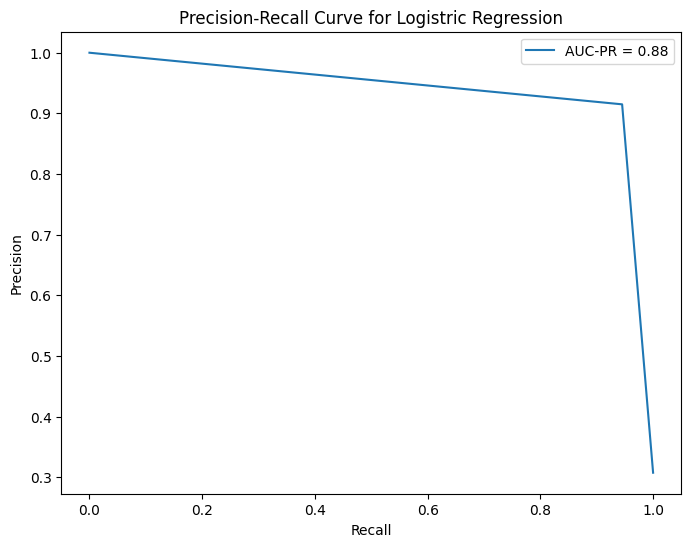

AUC-PR for Logistic Regression: 0.8815


In [29]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_lr)
auc_pr = average_precision_score(y_test, y_pred_lr)

# Plotting the Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistric Regression')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Logistic Regression: {auc_pr:.4f}")

In [30]:
# Evaluating Random Forest Model

# Classification Report
print(f"Classification Report for Random Forest: \n{classification_report(y_test, y_pred_rf)}")

Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.95      0.95      0.95        91

    accuracy                           0.97       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.97      0.97      0.97       296



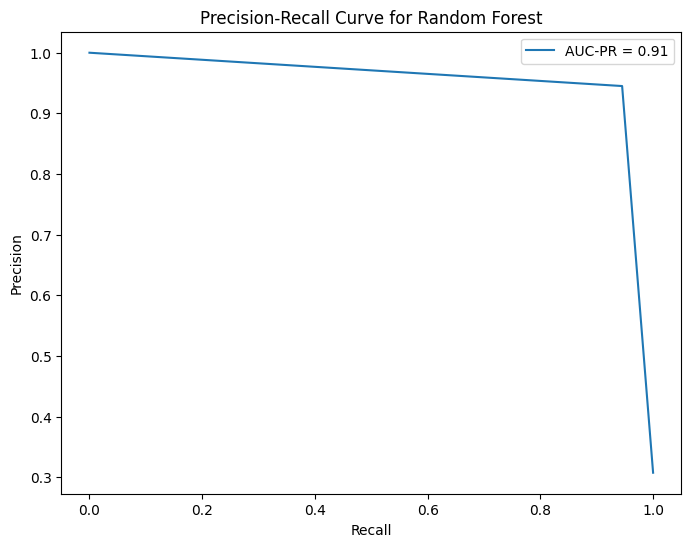

AUC-PR for Random Forest: 0.9100


In [31]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)
auc_pr = average_precision_score(y_test, y_pred_rf)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Random Forest: {auc_pr:.4f}")

In [37]:
# Evaluating Gradient Boosting Model

# Classification Report
print(f"Classification Report for Gradient Boosting: \n{classification_report(y_test, y_pred_gb)}")

Classification Report for Gradient Boosting: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       205
           1       0.91      0.95      0.93        91

    accuracy                           0.96       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



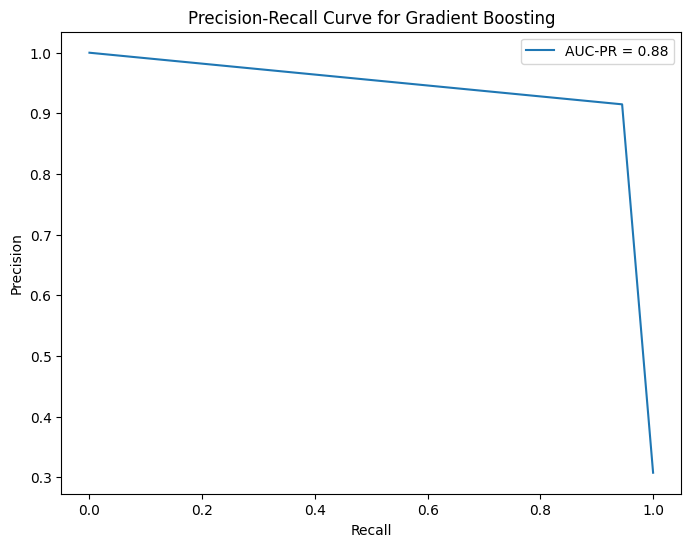

AUC-PR for Gradient Boosting: 0.8815


In [38]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb)
auc_pr = average_precision_score(y_test, y_pred_gb)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Gradient Boosting: {auc_pr:.4f}")

## Oversampling

In [39]:
# Separating features and target variables
X = cc_df2.drop('Class', axis=1)
y = cc_df2['Class']

In [40]:
# Performing data preprocessing and normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [42]:
from imblearn.over_sampling import SMOTE

# Undersampling using RandomUnderSampler
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_norm, y)

In [43]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

### Classification - Logistic Regression

In [48]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
# print(y_pred_lr)

In [49]:
value_count = Counter(y_pred_lr)

print(f"Logistic Regression Prediction: Out of {len(y_pred_lr)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Logistic Regression Prediction: Out of 85295 transactions, there're 26224 frauds and 59071 normal transactions.


### Classification - Random Forest

In [47]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# print(y_pred_rf)

In [50]:
value_count = Counter(y_pred_rf)

print(f"Logistic Regression Prediction: Out of {len(y_pred_rf)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Logistic Regression Prediction: Out of 85295 transactions, there're 28530 frauds and 56765 normal transactions.


### Classification - Gradient Boosting

In [51]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gb = gbc.predict(X_test)
# print(y_pred_gb)

In [52]:
value_count = Counter(y_pred_gb)

print(f"Logistic Regression Prediction: Out of {len(y_pred_gb)} transactions, there're {value_count[1]} frauds and {value_count[0]} normal transactions.")

Logistic Regression Prediction: Out of 85295 transactions, there're 27348 frauds and 57947 normal transactions.


### Evaluating Models

In [53]:
# Evaluating Logistic Regression Model in oversampling condition

# Classification Report
print(f"Classification Report for Logistic Regression: \n{classification_report(y_test, y_pred_lr)}")

Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56777
           1       0.98      0.90      0.93     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295



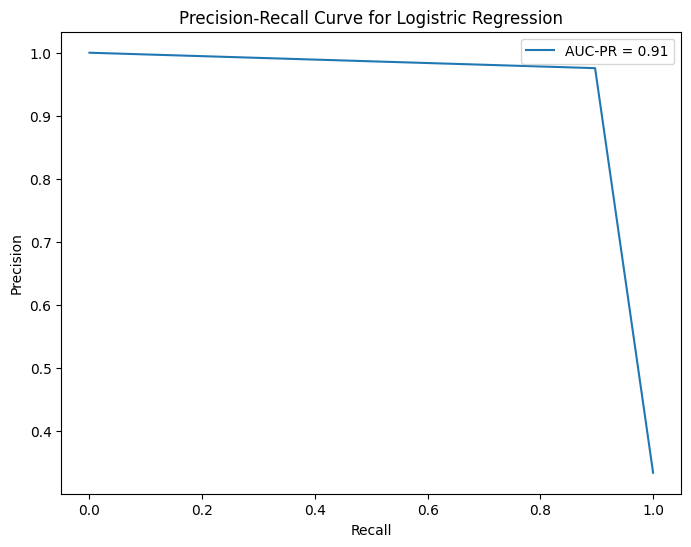

AUC-PR for Logistic Regression: 0.9096


In [54]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_lr)
auc_pr = average_precision_score(y_test, y_pred_lr)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistric Regression')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Logistic Regression: {auc_pr:.4f}")

In [55]:
# Evaluating Random Forest Model after oversampling

# Classification Report
print(f"Classification Report for Random Forest: \n{classification_report(y_test, y_pred_rf)}")

Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



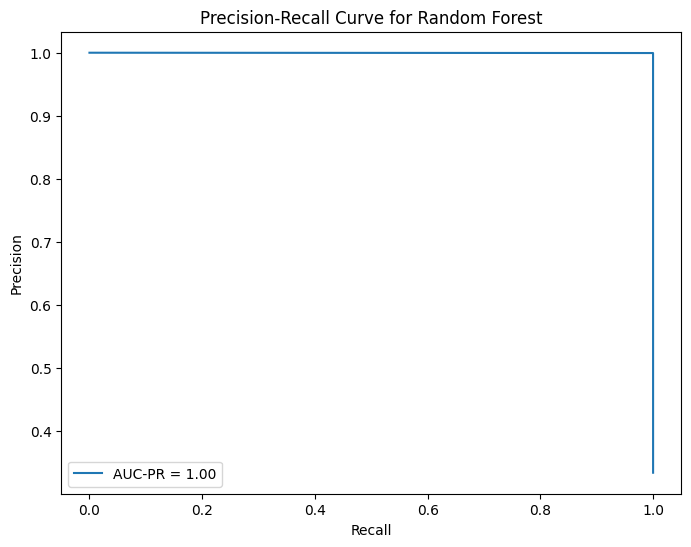

AUC-PR for Random Forest: 0.9995


In [56]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)
auc_pr = average_precision_score(y_test, y_pred_rf)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Random Forest: {auc_pr:.4f}")

In [57]:
# Evaluating Gradient Boosting Model after oversampling

# Classification Report
print(f"Classification Report for Gradient Boosting: \n{classification_report(y_test, y_pred_gb)}")

Classification Report for Gradient Boosting: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56777
           1       0.99      0.95      0.97     28518

    accuracy                           0.98     85295
   macro avg       0.98      0.97      0.98     85295
weighted avg       0.98      0.98      0.98     85295



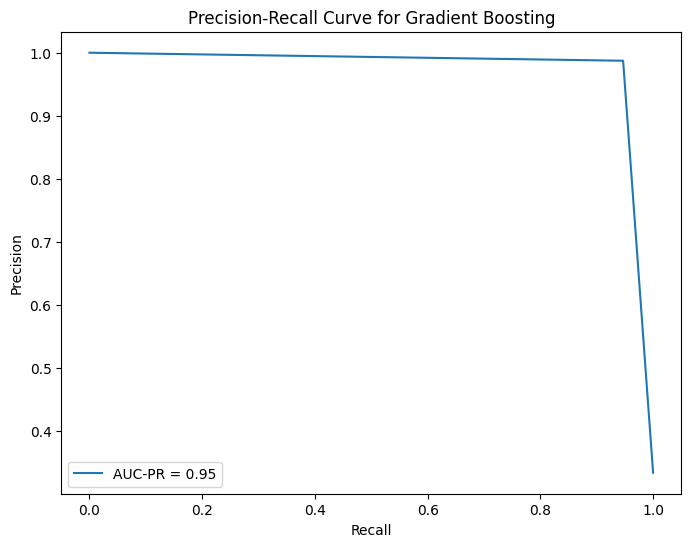

AUC-PR for Gradient Boosting: 0.9526


In [58]:
# Plotting accuracy using Area Under the Precision Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb)
auc_pr = average_precision_score(y_test, y_pred_gb)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc='best')
plt.show()
print(f"AUC-PR for Gradient Boosting: {auc_pr:.4f}")

This shows that Random Forest Classifier is much better at predicting fraud than other models.